In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
path = r'D:\Plus\PYTHON\吴恩达练习\data_sets\ex2data1.txt'
data = pd.read_csv(path,header = None,names = ['Exam 1','Exam 2','Admitted'])
data.head()

In [ ]:
positive = data[data['Admitted'].isin([1])] #选取data中ad为1的行  isin
negative = data[data['Admitted'].isin([0])] #选取data中ad为0的行

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s = 50,c = 'b',marker = 'o',label = 'Admitted') #选取ad = 1 的点
ax.scatter(negative['Exam 1'],negative['Exam 2'],s = 50,c = 'r',marker = 'x',label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()


In [ ]:
positive.head()

In [ ]:
#实现sigmoid函数 
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
# 实现代价函数
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X.dot(theta.T))))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X.dot(theta.T))))
    return np.sum(first - second) / (len(X))

In [ ]:
#初始化X,y, Theta
#添加一列常数列，用于theta0
data.insert(0,'Ones',1)
#初始化X，y，theta
cols = data.shape[1]#获得列数
X = data.iloc[:,:cols-1]
y = data.iloc[:,cols-1:cols]

In [ ]:
Theta = np.zeros(3)  #初始化Theta 
X = np.array(X.values)
y = np.array(y.Values)

In [ ]:
X.shape,y.shape,Theta.shape

In [ ]:
#计算初始的cost
cost(Theta,X,y)

In [ ]:
# 实现梯度计算的函数(并没有更新theta)
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X.dot(theta.T))-y

    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term)/len(X)

    return grad


In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X, y))
result

In [ ]:
cost(result[0], X, y)

In [ ]:
#实现梯度
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X.dot(theta.T)) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=Theta, fprime=gradient, args=(X, y))
'''
func是要最小化的函数
x0是最小化函数的自变量
fprime是最小化的方法
args是func的除theta外的
'''
result

In [ ]:
cost(result[0],X,y) #带入最优Theta进行验证

In [ ]:
#画出决策边界
plotting_x1 = np.linspace(30,100,100) #取点 从30到100 取100个点画出线
plotting_h1 = (-result[0][0] - result[0][1] * plotting_x1)/result[0][2]

fig,ax = plt.subplots(figsize = (12,8))
ax.plot(plotting_x1,plotting_h1,c = 'y',label = 'Prediction') #  画线 

ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()




In [ ]:
def hfunc1(theta,X):
    return sigmoid(np.dot(X,theta.T)) #预测能否通过
hfunc1(result[0],[1,45,85])

In [152]:
def Predict(theta,X):
    probability = sigmoid(np.dot(X,theta.T))
    return [1 if x >= 0.5 else 0 for x in probability] 
theta_min = np.matrix(result[0])
predictions = Predict(theta_min,X)
#predictions 得到一个预测结果的数组
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y.iloc[:,0])]
#zip 将两个列表打包为元组的列表 并且是相同位置一一对应
accuracy = (sum(map(int, correct)) % len(correct)) #map是把函数func依次映射到序列或迭代器上的每个元素上进行运算 这里不用map直接sum(correct)也可以 返回列表的和
print ('accuracy = {0}%'.format(accuracy))

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
'''
在训练的第二部分，我们将实现加入正则项提升逻辑回归算法。
设想你是工厂的生产主管，你有一些芯片在两次测试中的测试结果，测试结果决定是否芯片要被接受或抛弃。你有一些历史数据，帮助你构建一个逻辑回归模型。
'''

In [ ]:
path = r'D:\Plus\PYTHON\吴恩达练习\data_sets\ex2data2.txt'
data = pd.read_csv(path,names = ['Test 1','Test 2','Accepted'])
data.head()

In [ ]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['Test 1'],positive['Test 2'],c = 'b',marker = 'o',label = 'Accepted')
ax.scatter(negative['Test 1'],negative['Test 2'],c = 'r',marker = 'x',label = 'Rejected')
ax.legend() #画出标签板
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [ ]:
#以上图片显示，这个数据集不能像之前一样使用直线将两部分分割。而逻辑回归只适用于线性的分割，所以，这个数据集不适合直接使用逻辑回归。

In [ ]:
#2.2 特征映射
#一种更好的使用数据集的方式是为每组数据创造更多的特征。所以我们为每组X1,X2添加了最高到6次幂的特征



In [ ]:
degree = 6
x1 = data['Test 1']
x2 = data['Test 2']
# 添加高次幂特征值   
for i in range(1,degree+1):
    for j in range(i+1):
        data['F'+str(i-j)+str(j)] = np.power(x1,i-j) * np.power(x2,j)
data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

In [114]:
data.head()

100

In [142]:
#实现正则化的代价函数
def costReg(theta,X,y,learningRate):
    m = len(X)
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    first = np.multiply(-y,np.log(sigmoid(X.dot(theta.T))))
    second = np.multiply((1 - y),np.log(1 - sigmoid(X.dot(theta.T))))
    reg = (learningRate/(2*m)) * np.sum(np.power(theta[:,1:theta.shape[1]],2))# theta0 不需要正则化 所以从1开始，有无正则化对结果影响不大，所以按照惯例不对theta0进行正则化
    
    return np.sum(first - second)/m + reg


In [150]:
#实现正则化的梯度函数
def gradientReg(theta,X,y,learningRate):
    m = len(X)
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters) #初始化theta

    error = sigmoid(X.dot(theta.T)) - y

    for i in range(parameters):
        term = np.multiply(error,X[:,i])

        if i==0:
            grad[i] = np.sum(term)/m
        else:
            grad[i] = (np.sum(term)/m) + ((learningRate/m) * theta[:,i])
    return grad

In [184]:
#初始化X，y,theta
cols = data.shape[1]
X = data.iloc[:,1:]
y = data.iloc[:,0:1]
theta = np.zeros(cols-1)

X = np.array(X.values)
y = np.array(y.values)

learningRate = 0
data.head()


,Accepted,ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [145]:
costReg(theta,X,y,learningRate)

0.6931471805599454

In [151]:
result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, learningRate))
result

(array([ 1.27271027,  0.62529965,  1.18111687, -2.01987399, -0.91743189,
        -1.43166928,  0.12393228, -0.36553118, -0.35725403, -0.17516292,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603299, -0.04466178, -0.27778951, -0.29539513,
        -0.45645982, -1.04319155,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]),
 32,
 1)

In [185]:
theta_min = np.matrix(result[0])
predictions = Predict(theta_min,X)
correct = [1 if ((a==1 and b == 1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = sum(correct) % len(correct)
print ('accuracy = {0}%'.format(accuracy))


accuracy = 103%


In [160]:
#画出决策曲线
def hfunc2(theta, x1, x2):
    temp = theta[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp+= np.power(x1, i-j) * np.power(x2, j) * theta[0][place+1] #写出多项式
            place+=1
    return temp

In [161]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000) 

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfunc2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

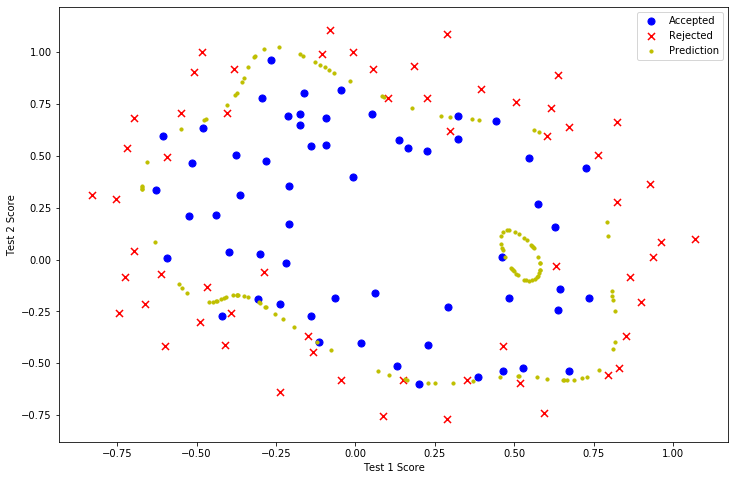

In [182]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()

In [179]:
costReg(theta,X,y,learningRate)

0.6931471805599454

In [180]:
learningRate = 0 #过拟合
result = opt.fmin_tnc(func = costReg,x0 = theta,fprime = gradientReg,args = (X,y,learningRate))

In [181]:
result

(array([  13.21662791,   17.63904891,    5.27881592, -136.13732177,
         -67.12242042,  -52.94668399, -147.43086589,  -91.68410686,
         -38.38361129,    6.59822331,  495.35657992,  402.46736709,
         511.3069028 ,  206.24695325,   66.55863181,  273.9167483 ,
         304.90920777,  318.45935938,  157.30786853,   54.95286981,
           1.80807367, -601.66243281, -692.5740057 , -962.14314287,
        -654.83889729, -639.88930817, -262.03506162,  -50.59000875]),
 280,
 3)